# Extraindo as Letras da Discografia da Dinah Jane

Dinah Jane Milika Ilaisaane Hansen Amasio (Santa Ana, 22 de junho de 1997) é uma cantora, atriz e compositora norte-americana. Ela é conhecida por ser ex-integrante do grupo feminino Fifth Harmony, formado em 2012 através da segunda temporada do *reality show The X Factor US*. Dinah lançou seu primeiro single como cantora solo, *Bottled Up*, em setembro de 2018, com parceria de Ty Dolla Sign e Marc E. Bassy. Já em abril de 2019 ela lançou o EP Dinah Jane 1, contendo três faixas, *Heard It All Before*, *Pass Me B*y e *Fix It*.

Mais informações no link: https://pt.wikipedia.org/wiki/Dinah_Jane

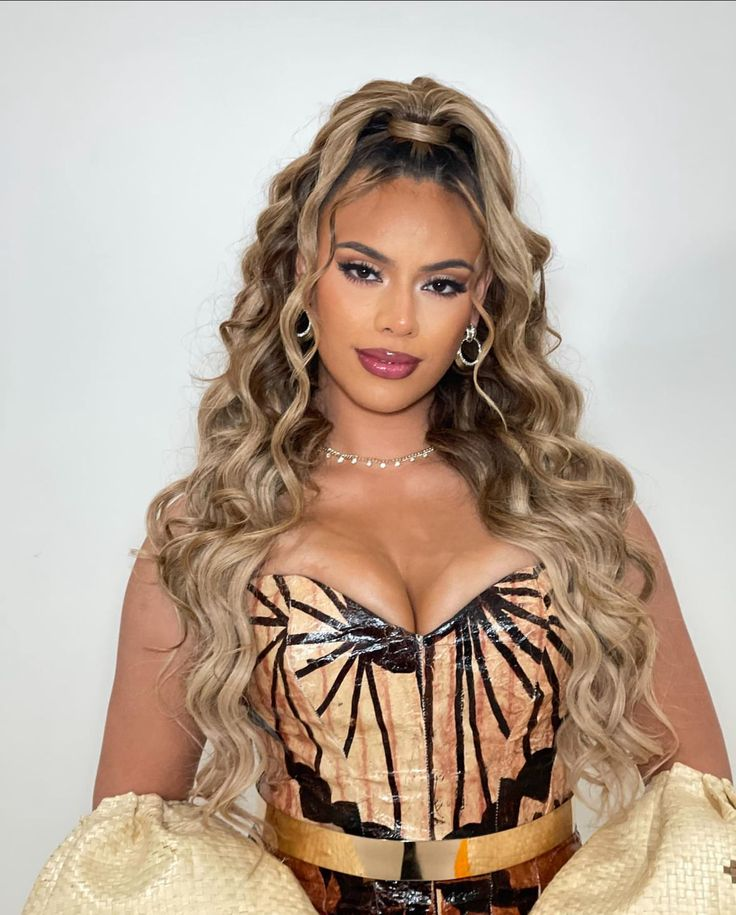

## API LyricsGenius

A API LyricsGenius é uma poderosa ferramenta que permite acessar uma vasta coleção de letras de músicas e informações sobre artistas. Desenvolvida pela Genius, uma plataforma conhecida por sua base de dados de letras e anotações, a API oferece funcionalidades que facilitam a busca por letras, detalhes de álbuns, informações sobre colaboradores e muito mais. Com suporte a consultas por nome de artista, título da música ou até mesmo trechos de letras, a API é especialmente útil para desenvolvedores que desejam integrar dados musicais em aplicativos e sites. Além disso, a API fornece recursos para obter anotações e interpretações das letras, enriquecendo a experiência do usuário ao explorar o significado das músicas. Através da LyricsGenius API, os amantes da música e os desenvolvedores podem aprofundar sua compreensão sobre as canções e seus criadores, trazendo um novo nível de interação com a música.

Mais informações e a documentação de como usar a API no link: https://docs.genius.com/



In [ ]:
import os
import pandas as pd
import requests
import lyricsgenius
import csv

# Chamada de Requisição
api_key = "YOUR_API_KEY"
genius = lyricsgenius.Genius(api_key)

# Busca do artista na API
artist = genius.search_artist("Dinah Jane", max_songs=30)

Searching for songs by Dinah Jane...

Song 1: "Bottled Up"
Song 2: "SZNS"
Song 3: "Heard It All Before"
Song 4: "Retrograde"
Song 5: "Fix It"
Song 6: "Lottery"
Song 7: "Missed a Spot"
Song 8: "Pass Me By"
Song 9: "All 2 U"
Song 10: "1501"
Song 11: "Ya Ya"
Song 12: "I Don’t Mind"
Song 13: "Dancing Like A White Girl"
Song 14: "Bottled Up (Versión Español)"
"Magic" is not valid. Skipping.
Song 15: "Road Less Traveled"
Song 16: "Bottled Up (Versão Portuguesa)"
Song 17: "I Want You"
Song 18: "LET’S GO"
"Coach" is not valid. Skipping.
Song 19: "Ocean Song"
Song 20: "X*"
"Christmas Medley" is not valid. Skipping.
Song 21: "Something About You"
Song 22: "TELL ME"
Song 23: "This One’s For You Haters"
Song 24: "Let Me Love You"
Song 25: "No Rush"
Song 26: "CINDERELLA STORY"
Song 27: "JUST US TWO"
Song 28: "Energy*"
Song 29: "Faithful To Toxic (Demo)"
Song 30: "If I Were a Boy"

Reached user-specified song limit (30).
Done. Found 30 songs.


In [ ]:
# Importando para um arquivo json
artist.save_lyrics()

Wrote Lyrics_DinahJane.json.


In [ ]:
# Acessando as chaves principais dos dados contidos no arquivo JSON
data = json.load(open("Lyrics_DinahJane.json", "r"))
data.keys()

dict_keys(['alternate_names', 'api_path', 'description', 'facebook_name', 'header_image_url', 'id', 'image_url', 'instagram_name', 'is_meme_verified', 'is_verified', 'name', 'translation_artist', 'twitter_name', 'url', 'current_user_metadata', 'followers_count', 'description_annotation', 'user', 'songs'])

In [ ]:
# Carregando dados em um dataframe e examinando os dados dentro de 'songs'
df = pd.DataFrame(data['songs'])
df.keys()

Index(['annotation_count', 'api_path', 'artist_names', 'full_title',
       'header_image_thumbnail_url', 'header_image_url', 'id',
       'lyrics_owner_id', 'lyrics_state', 'path', 'primary_artist_names',
       'pyongs_count', 'relationships_index_url', 'release_date_components',
       'release_date_for_display',
       'release_date_with_abbreviated_month_for_display',
       'song_art_image_thumbnail_url', 'song_art_image_url', 'stats', 'title',
       'title_with_featured', 'url', 'featured_artists', 'primary_artist',
       'primary_artists', 'apple_music_id', 'apple_music_player_url',
       'description', 'embed_content', 'featured_video', 'language',
       'recording_location', 'release_date', 'current_user_metadata',
       'song_art_primary_color', 'song_art_secondary_color',
       'song_art_text_color', 'album', 'custom_performances',
       'description_annotation', 'lyrics_marked_complete_by',
       'lyrics_marked_staff_approved_by', 'media', 'producer_artists',
     

In [ ]:
# Selecionando os dados úteis em um novo dataframe
df_oficial = df[['title', 'lyrics', 'release_date']].copy()

# Classificando as músicas pelo álbum
df_oficial['Album'] = df['album'].apply(lambda x: x.get('name') if isinstance(x, dict) else None)

# Eliminando músicas que não pertencem aos álbuns oficiais
df_oficial = df_oficial.drop(index=[11, 13, 15, 16, 19, 23, 27, 28, 29])

# Reseta o índice, se necessário
df_oficial.reset_index(drop=True, inplace=True)

# Convertendo a coluna 'release_date' para o formato de data
df_oficial['release_date'] = pd.to_datetime(df_oficial['release_date'], errors='coerce')

# Extraindo apenas o ano da coluna 'release_date' para armazenar na 'release_year'
df_oficial['release_year'] = df_oficial['release_date'].dt.year

# Exibindo o dataframe resultante
df_oficial

,title,lyrics,release_date,Album,release_year
0,Bottled Up,[Intro: Dinah Jane]\nDinah Jane\n\n[Verse 1: D...,2018-09-21,Bottled Up — Single,2018
1,SZNS,[Intro]\n\n[Chorus: Dinah Jane & A Boogie wit ...,2019-07-26,None,2019
2,Heard It All Before,[Verse 1]\nWhat you say won't change the way I...,2019-04-19,Dinah Jane 1,2019
3,Retrograde,"[Intro]\nHey (Yeah, yeah, yeah)\nYeah, yeah, y...",2019-05-08,None,2019
4,Fix It,[Verse 1]\nI'm trying my best to let this come...,2019-04-19,Dinah Jane 1,2019
5,Lottery,"[Verse 1]\nI be frontin' to the public, I’m a ...",2020-03-13,None,2020
6,Missed a Spot,[Verse 1]\nI know I'm in your head\nWhen you'r...,2020-04-03,None,2020
7,Pass Me By,[Verse 1]\nI just want to enjoy my life\nDon't...,2019-04-19,Dinah Jane 1,2019
8,All 2 U,[Instrumental]\n\n[Verse 1: Dinah Jane Hansen]...,2016-08-09,None,2016
9,1501,"[Verse 1]\nBoy, you want that ooh-na-na\nRing-...",2020-03-20,None,2020


In [ ]:
import nltk
from nltk.corpus import stopwords
import re

# Define uma função para remover stopwords de um texto
def remove_stopwords(text):
    # Separa o texto em uma lista de palavras
    text = text.split(' ')
    # Filtra a lista, mantendo apenas as palavras que não estão na lista de stopwords em inglês
    text = [x for x in text if x not in stopwords.words('english')]
    # Junta a lista de palavras filtradas em uma única string e a retorna
    return ' '.join(text)

# Aplica a função de remoção de stopwords em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_stopwords(x))

# Define uma função para remover pontuação do texto
def remove_ponctuation(text):
    # Usa uma expressão regular para manter apenas letras (maiúsculas e minúsculas) e junta as palavras em uma string
    return " ".join(re.findall("[a-zA-Z]+", text))

# Aplica a função de remoção de pontuação em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_ponctuation(x))

# Define uma função para remover palavras com menos de 3 caracteres do texto
def remove_words_with_less_3(text):
    # Separa o texto em uma lista de palavras
    text = text.split(' ')
    # Filtra a lista, mantendo apenas as palavras com mais de 3 caracteres
    text = [x for x in text if len(x) > 3]
    # Junta a lista de palavras filtradas em uma única string e a retorna
    return ' '.join(text)

# Aplica a função de remoção de palavras curtas em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_words_with_less_3(x))

# Converte todo o texto em letras minúsculas em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: x.lower())

# Cria uma nova coluna 'Word Count' no dataframe que conta o número de palavras em cada linha da coluna 'lyrics'
df_oficial['Word Count'] = df_oficial['lyrics'].apply(lambda x: len(x.split(' ')))

# Função para remover as palavras indesejadas
def remove_unwanted_words(text):
    words_to_remove = ["embed", "intro", "verse", "chorus", "outro", "instrumental"]
    pattern = r'\b(?:' + '|'.join(words_to_remove) + r')\b'
    return re.sub(pattern, '', text, flags=re.IGNORECASE)

# Aplicar a função na coluna de letras
df_oficial["lyrics"] = df_oficial["lyrics"].apply(remove_unwanted_words)

# Salvar o CSV atualizado
df_oficial.to_csv("DinahJaneLyrics.csv", index=False)

In [ ]:
import sqlite3

# Criando um banco de dados de teste
conn = sqlite3.connect('DinahJane.db')

# Salvando no banco de dados
df_oficial.to_sql('lyrics', conn, index=False)

# Verificando se os dados estão presentes no banco de dados
c = conn.cursor()
c.execute('''
SELECT * FROM LYRICS
          ''')
# Visualização do Banco de Dados gerado
c.fetchall()

[('Bottled Up',
  ' dinah jane dinah jane  dinah jane need diamond ring baby finer things simple things best things life free know since gave love opened eyes  dinah jane chick need work home stay sleep tonight yeah know like ride gonna ride back back make through sleep tonight yeah know like  marc bassy drinking baby cause bottled smoking baby yeah high fuck drinking baby cause bottled smoking baby yeah high fuck  dolla dinah jane both dolla bottled yeah yeah bottled yeah feeling like drunk love yeah wrist mean shit when tell mine know mean rocks little baby french vanilla ciroc yeah could anywhere world right girl woah woah  marc bassy dolla dinah jane drinking baby cause bottled baby smoking baby yeah high fuck simple things drinking baby cause bottled bottled smoking baby yeah high fuck bottled  dinah jane dolla know appeal sell could night stand real putting work feel worth gonna bust down yeah yeah yeah  dinah jane chick need woah woah work home stay yeah sleep tonight yeah know 